# Proyecto de análisis EDA por Alejandro-Camacho.
Materia: Desarroyo de proyectos.  
Alumno: Alejandro Gabriel Camacho Hernández.  
Maestro: Victor Cuspinera Contreras.  


## Pregunta que buscamos resolver con esta información. 
¿Que consola de videojuego comprar?'
* Considerando la oferta de videojuegos del genero, acción y de peleas.
* Que tengan una fecha de salida a partir del 2015


In [28]:
### IMPORTAR LAS LIBRERIAS

import pandas as pd  # paqueteria pandas con alias pd, para trabajar con data frames
import numpy as np   # operaciones matemáticas 
import matplotlib.pyplot as plt  # para generar gráficos
from IPython.display import Image   # Incluir imágenes propias dentro del notebook
import os 


## Leer tus datos. 
Al momento de conseguir los datos, fue importante hacer una leída rapida de ellos,para ver como estaban estructurados, y así poder importarlos y visualizarlos de forma correcta.   

En este caso, el  dataset, llamado "Video_Games" es un formato cvs separado por "," y que contiene indices. 


In [20]:
#### IMPORTAR EL DATASET 

dataset_games=pd.read_csv('C:/Users/andro/OneDrive/Documentos/Maestria Ciencia de Datos/Cuarto Semestre/Desarrollo De Proyectos 2/Proyecto mitad de curso/Video_Games.csv', index_col=0, 
engine='python') 


## Revisar el paquete. 

Ya teniendo la información cargada, hacemos uso de ciertas herramientas para una lectura rápida del dataset y empezar a familiarizarnos con la información que hemos obtenido.   

Realizamos **dataset_games.shape** para ver el tamaño del dataset (Variables y registros).  
Utilizamos **dataset_games.shape.columns** para saber los nombres de las variables,   
**dataset_games.shape.info** para un reporte rápido del dataset.  
Y por ultimo **dataset_games.describe** para ver datos de estadistica discriptiva. 

In [29]:

print('Cantidad de Filas y columnas:',dataset_games.shape)
print('Nombre columnas:',dataset_games.columns)

Cantidad de Filas y columnas: (16719, 15)
Nombre columnas: Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [30]:
dataset_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16719 entries, Wii Sports to Winning Post 8 2016
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   Publisher        16665 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Global_Sales     16719 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       10015 non-null  object 
 12  User_Count       7590 non-null   float64
 13  Developer        10096 non-null  object 
 14  Rating           9950 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [36]:
	
dataset_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,1974.204019,0.263330,0.145025,0.077602,0.047332,0.533543,33.566003,12.829595,73.648245
std,252.530614,0.813514,0.503283,0.308818,0.186710,1.547935,35.817714,18.679793,386.695153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,21.000000,20.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


En este momento del EDA ya conocemos las variables que tenemos a nuestra disposición y el volumen de los datos (cuantos registros existen).  


* Name: Nombre del video Juego.
* Platform: La plataforma en la que se lanzó el juego, como PlayStation, Xbox, Nintendo, etc.
* Year_of_Release: Año en el que se realizo el videojuego.
* Genre: Genero.
* Publisher: La empresa responsable de publicar el juego.
* NA_Sales: Las ventas del juego en América del Norte.
* EU_Sales: Las ventas del juego en Europa.
* JP_Sales: Las ventas del juego en Japon.
* Other_Sales: Otras ventas en otros paises.
* Global_Sales: Suma total de las ventas.

Tambien que tipo de dato son las vairables (Texto, numero...) y si tenemos la información completa en cada una de las columnas.  
Por ejemplo, si una de nuestras variables en las que tuvieramos interes fuera el puntaje de los usuarios, tendríamos que tomar en cuenta que tenemos información missing en esa variable.  

## Look at the Top and the Bottom of your Data

Podemos ver las primeras lineas y ultimas, solamente poniendo el nombre de nuestro dataframe y corriendo el codigo. 

Esto nos da mejor visiblidad de los datos y entendimiento de como nuestros datos están estructurados. 

In [21]:
dataset_games

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dataset_games = dataset_games.fillna(0)
dataset_games['Year_of_Release'] = dataset_games['Year_of_Release'].astype('int')

In [35]:
dataset_games 

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0,0.0,0,0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0,0.0,0,0
LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0,0.0,0,0
Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0,0.0,0,0


## Validando la información. 

Es importante confirmar si nuestra información es de fiar, por lo cuál es recomendado buscar en otras fuentes si los datos coinsiden.  
En la siguiente imagen podemos confirmar que la información de nuestro dataset concuerda y aunque hay una pequeña diferencia, esta no representa una gran diferencia. 

<img src="fuente_statista.png.jpg" alt="Drawing" style="width: 700px;"/>

- Fuente: [Juegos mas vendidos para la consola wii nintendo](https://es.statista.com/estadisticas/589290/juegos-mas-vendidos-para-la-consola-wii-nintendo/#:~:text=Wii%20Sports%20fue%20el%20juego,83%20millones%20de%20unidades%20vendidas.)

In [22]:
dataset_games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [23]:
dataset_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [24]:
dataset_games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:

#topglobal = dataset_games[['Name','Platform', 'Global_Sales']].sort_values(by="Global_Sales",ascending=False)


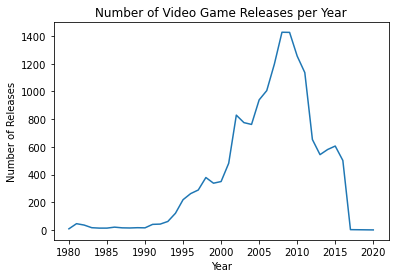

In [27]:
year_counts = dataset_games.groupby("Year_of_Release").size()
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Video Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()